<a href="https://colab.research.google.com/github/shreenath2001/Responsive_Design/blob/master/Sentiment_Analysis_of_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("train.txt")

In [3]:
df.head()

,tweet_id,sentiment,tweet_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...


In [4]:
df['tweet_text'][0]

'Gas by my house hit $3.39!!!! I\\u2019m going to Chapel Hill on Sat. :)'

In [5]:
df.describe()

,tweet_id
count,2.146500e+04
mean,4.084325e+17
std,1.992714e+17
min,9.083248e+16
25%,2.587897e+17
50%,2.642246e+17
75%,6.360488e+17
max,6.416760e+17


In [6]:
df.columns

Index(['tweet_id', 'sentiment', 'tweet_text'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21465 entries, 0 to 21464
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    21465 non-null  int64 
 1   sentiment   21465 non-null  object
 2   tweet_text  21465 non-null  object
dtypes: int64(1), object(2)
memory usage: 503.2+ KB


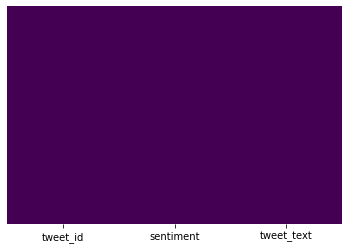

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = "viridis")

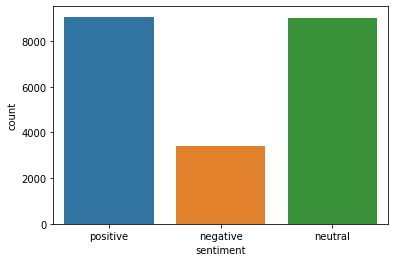

In [9]:
sns.countplot(data = df, x = "sentiment")

In [0]:
df['length'] = df['tweet_text'].apply(len)

In [11]:
df.head()

,tweet_id,sentiment,tweet_text,length
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,70
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,81
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,90
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,135
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,143


In [12]:
df.length.describe()

count    21465.000000
mean       117.824924
std         79.300004
min         22.000000
25%         99.000000
50%        126.000000
75%        138.000000
max       7258.000000
Name: length, dtype: float64

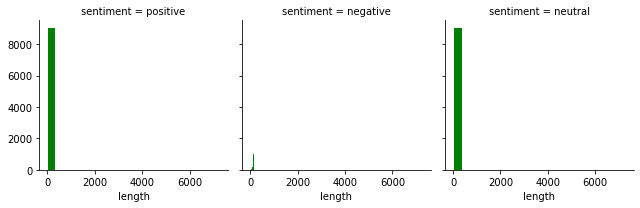

In [13]:
g = sns.FacetGrid(data = df, col = 'sentiment', col_wrap = 3)
g.map(plt.hist, 'length',bins = 20,  color = 'g')

In [0]:
def con_sen_to_rat(sentiment):
    if(sentiment == "positive"):
        return 1
    elif(sentiment == "negative"):
        return -1
    else:
        return 0

In [0]:
df['sentiment'] = df['sentiment'].apply(con_sen_to_rat)

In [16]:
df.head()

,tweet_id,sentiment,tweet_text,length
0,264183816548130816,1,Gas by my house hit $3.39!!!! I\u2019m going t...,70
1,263405084770172928,-1,Theo Walcott is still shit\u002c watch Rafa an...,81
2,262163168678248449,-1,its not that I\u2019m a GSP fan\u002c i just h...,90
3,264249301910310912,-1,Iranian general says Israel\u2019s Iron Dome c...,135
4,262682041215234048,0,Tehran\u002c Mon Amour: Obama Tried to Establi...,143


In [17]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
def message_cleaning(message):
    remove_punctuation = [ letter  for letter in message  if letter not in string.punctuation  ]
    mes_w_o_pun = "".join(remove_punctuation)
    remove_stopwords = [ lemmatizer.lemmatize(word) for word in mes_w_o_pun.split() if word.lower() not in set(stopwords.words("english"))   ]
    return remove_stopwords

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer = message_cleaning)
df_cv = cv.fit_transform(df['tweet_text'])

In [20]:
print(cv.get_feature_names())

['0', '00', '000', '001', '001111', '0030', '004', '0048', '0055', '007', '00pm', '01', '011', '0118704263', '012', '0120', '01200121', '0121', '018', '01943', '01Sep', '01u002c', '02', '0200', '0230PM', '025', '02u002c', '03', '038', '04', '040', '040hz', '05', '053', '054', '06', '0607', '064', '0646671555', '065716', '067', '07', '0730PM', '0748', '08', '0800', '08003283508', '0830', '08sold', '09', '090615', '09092015', '09109839513', '0930', '0ct', '0u002c', '0u002c2', '1', '10', '100', '1000', '10000', '100000', '100000000', '10000th', '10005000', '1000pm', '1003', '10037', '1005', '1007', '10089u002c', '100PM', '100Tweets4Nabeel', '100pm', '100pmu002c', '100th', '100u002c000', '101', '1010', '10102011', '1011', '101115am', '101130', '101214', '1015', '1015mph', '1016', '101614', '1017', '1018', '101greatgoals', '102', '1020', '1021', '1021Edge', '1022', '1023', '1024', '1025pm', '1027', '1027TOMORROW', '1028', '1028pm', '1029Klite', '1029u002c', '102am', '103', '1030', '1030am',

In [21]:
print(df_cv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
print(df_cv.shape)

(21465, 53780)


In [0]:
X = df_cv
y = df['sentiment'].values

In [0]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()

In [25]:
y

array([ 1, -1, -1, ...,  0,  1,  0])

In [26]:
NB_classifier.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

          -1       0.95      0.64      0.77      3387
           0       0.89      0.87      0.88      9014
           1       0.83      0.95      0.88      9064

    accuracy                           0.87     21465
   macro avg       0.89      0.82      0.84     21465
weighted avg       0.87      0.87      0.86     21465

[[2182  519  686]
 [  72 7812 1130]
 [  47  414 8603]]


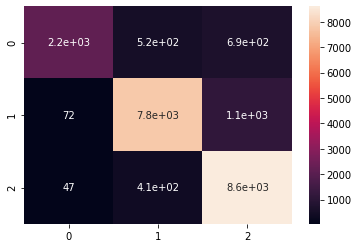

In [28]:
y_predict_train = NB_classifier.predict(X)
cm = confusion_matrix(y, y_predict_train)
sns.heatmap(cm, annot=True)
print(classification_report(y, y_predict_train))
print(cm)

In [0]:
test_df = pd.read_csv("test_samples.txt")

In [30]:
test_df.head()

,tweet_id,tweet_text
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,"Excuse the connectivity of this live stream, f..."


In [0]:
test_df['length'] = test_df['tweet_text'].apply(len)

In [32]:
test_df.head()

,tweet_id,tweet_text,length
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",140
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,87
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,140
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",140
4,171874368908050432,"Excuse the connectivity of this live stream, f...",135


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer = message_cleaning)
df_cv = cv.fit_transform(test_df['tweet_text']).toarray()

In [34]:
print(cv.get_feature_names())

['0', '00', '0001', '01', '014', '01792', '01937', '02', '025', '04', '0405', '046', '05', '06', '07', '08', '08052012', '09', '0905', '093012', '0for2', '0ldieKTA', '0ofrann', '1', '10', '100', '1000', '10000', '10000x', '1000plus', '1001pm', '1004', '1004fm', '1005chunjiday', '100M', '100m', '100pcs', '100th', '101', '101012', '1012', '1013', '1015', '1017', '102', '1020pm', '1021', '10222012', '102612', '10292', '1030', '10304am', '1030pmet', '1034', '104', '1045am', '1047', '104pm', '105', '1050am', '1059', '106', '1080p', '1090', '10TH', '10am', '10am5pm', '10amnoon', '10pm', '10pm2', '10th', '11', '1100', '1100100pm', '110pm', '111', '1110', '1112', '1115', '113', '1130', '1130am', '1130pm', '114', '1141', '115', '116', '11AM', '11am', '11am1pm', '11amp', '11th', '11thyou', '12', '120', '1205', '120pcs', '121', '121027', '121212', '1213', '122', '122112', '1230', '1230am', '126', '128N', '12est', '12noon', '12pm', '12th', '12thplanet', '13', '130', '1300', '130pm', '131', '1325',

In [35]:
print(df_cv)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
print(df_cv.shape)

(5398, 18724)


In [37]:
type(df_cv)

numpy.ndarray

In [0]:
list1 = np.zeros((5398, 35056))

In [0]:
df_cv = np.concatenate((df_cv, list1), axis = 1)

In [40]:
print(df_cv.shape)

(5398, 53780)


In [0]:
y_predict_test = NB_classifier.predict(df_cv)

In [42]:
y_predict_test

array([ 0,  1, -1, ..., -1, -1, -1])

In [43]:
y_predict_test.shape

(5398,)

In [0]:
test_df['sentiment'] = y_predict_test

In [45]:
test_df.head()

,tweet_id,tweet_text,length,sentiment
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",140,0
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,87,1
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,140,-1
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",140,-1
4,171874368908050432,"Excuse the connectivity of this live stream, f...",135,0


In [0]:
def con_rat_to_sen(rating):
    if(rating == 1):
        return "positive"
    elif(rating == -1):
        return "negative"
    else:
        return "neutral"

In [0]:
test_df['sentiment'] = test_df['sentiment'].apply(con_rat_to_sen)

In [48]:
test_df.head()

,tweet_id,tweet_text,length,sentiment
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",140,neutral
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,87,positive
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,140,negative
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",140,negative
4,171874368908050432,"Excuse the connectivity of this live stream, f...",135,neutral


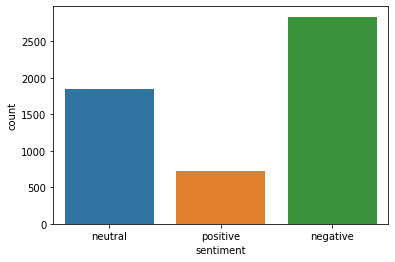

In [49]:
sns.countplot(data = test_df, x = "sentiment")

In [50]:
test_df.sentiment.describe()

count         5398
unique           3
top       negative
freq          2836
Name: sentiment, dtype: object

In [0]:
test_list = []
heading = ['tweet_id', 'sentiment']
test_list.append(heading)
for i in range(len(test_df['tweet_id'])):
    sub = []
    sub.append(test_df['tweet_id'][i])
    sub.append(test_df['sentiment'][i])
    test_list.append(sub)

In [52]:
test_list

[['tweet_id', 'sentiment'],
 [264238274963451904, 'neutral'],
 [218775148495515649, 'positive'],
 [258965201766998017, 'negative'],
 [262926411352903682, 'negative'],
 [171874368908050432, 'neutral'],
 [256010056942903296, 'neutral'],
 [253809989599232000, 'positive'],
 [261776619146985472, 'positive'],
 [264143999374356481, 'neutral'],
 [223052929131757571, 'neutral'],
 [264088575476391936, 'neutral'],
 [264030422244147200, 'neutral'],
 [263720820428394496, 'negative'],
 [258639996037259264, 'positive'],
 [250981027969896448, 'neutral'],
 [195554987919679488, 'positive'],
 [264225147542716416, 'neutral'],
 [260536025800142848, 'positive'],
 [192349690921103360, 'negative'],
 [263473556753620993, 'neutral'],
 [263182075434254336, 'positive'],
 [262434763493748736, 'neutral'],
 [256514267149385729, 'negative'],
 [263733718085140481, 'neutral'],
 [241403423130525699, 'negative'],
 [263690432473624578, 'negative'],
 [260072342905049088, 'neutral'],
 [259780914509389824, 'negative'],
 [264

In [53]:
len(test_list)

5399

In [0]:
import csv

In [0]:
with open('test_result.csv', 'w', newline='') as fp:
    a = csv.writer(fp, delimiter = ",")
    data = test_list
    a.writerows(data)

In [0]:
check = pd.read_csv("test_result.csv")

In [57]:
check.head()

,tweet_id,sentiment
0,264238274963451904,neutral
1,218775148495515649,positive
2,258965201766998017,negative
3,262926411352903682,negative
4,171874368908050432,neutral
